In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df =pd.read_csv("jamb_exam_results.csv")

In [3]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

In [6]:
del df['student_id']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [8]:
df.fillna(0, inplace=True)

In [9]:
len(df)

5000

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=1 )
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

In [11]:
len(df_train), len(df_test), len(df_val)

(3200, 1000, 800)

In [12]:
y_train = df_train['jamb_score']
y_val=df_val['jamb_score']
y_test=df_test['jamb_score']

In [13]:
del df_train['jamb_score']
del df_test['jamb_score']
del df_val['jamb_score']

In [14]:
from sklearn.feature_extraction import DictVectorizer

train_dicts =df_train.to_dict(orient='records')
dv= DictVectorizer(sparse=True)
X_train =dv.fit_transform(train_dicts)

In [15]:
dv.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level=None',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [17]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- study_hours_per_week <= 18.50
|   |--- value: [156.06]
|--- study_hours_per_week >  18.50
|   |--- value: [188.77]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
from sklearn.metrics import mean_squared_error

val_dicts=df_val.to_dict(orient='records')
X_val=dv.transform(val_dicts)

y_pred = rfr.predict(X_val)
print(mean_squared_error(y_pred,y_val, squared=False))

41.54324779672384


In [20]:
scores= []
estimators= range(10,251,10)
for n in estimators:
    rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_val)
    score = mean_squared_error(y_pred,y_val, squared=False)
    scores.append(score)
    print(n, score)

10 41.54324779672384
20 40.568140786521134
30 40.42273724169494
40 40.28674551341297
50 40.33035627787089
60 40.308190058149336
70 40.33469403766744
80 40.340785824975725
90 40.37829147230257
100 40.39739520686946
110 40.401218796820906
120 40.361209705254474
130 40.34022159126725
140 40.323593849238776
150 40.29040175470524
160 40.30256284681514
170 40.32186929317449
180 40.356027280286426
190 40.388807181362026
200 40.37063990041216
210 40.34309214177925
220 40.358927151578825
230 40.34500431533201
240 40.302411672113884
250 40.24726426404657


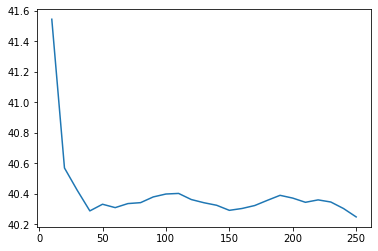

In [21]:
plt.plot(estimators, scores)
plt.show()

In [22]:
for d in [10,15,20,25]:
    scores =[]
    for n in estimators:
        rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth= d)
        rfr.fit(X_train,y_train)
        y_pred = rfr.predict(X_val)
        score = mean_squared_error(y_pred,y_val, squared=False)
        scores.append(score)
    print(d,np.mean(scores))

10 39.91931565573123
15 40.37460780186438
20 40.450799484475716
25 40.39580611219618


In [23]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth= 20)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [24]:
list(zip(dv.get_feature_names_out(),rfr.feature_importances_))

[('access_to_learning_materials=No', 0.01040780194066559),
 ('access_to_learning_materials=Yes', 0.011082582930500223),
 ('age', 0.0654742521733057),
 ('assignments_completed', 0.03239928541183147),
 ('attendance_rate', 0.14838349072187773),
 ('distance_to_school', 0.14030026520177424),
 ('extra_tutorials=No', 0.008659492554414509),
 ('extra_tutorials=Yes', 0.010001099679410794),
 ('gender=Female', 0.00972852035985584),
 ('gender=Male', 0.01022256618922653),
 ('it_knowledge=High', 0.023085474215520905),
 ('it_knowledge=Low', 0.011726461468716632),
 ('it_knowledge=Medium', 0.011615761661997582),
 ('parent_education_level=None', 0.01092678706212096),
 ('parent_education_level=Primary', 0.014044193228893592),
 ('parent_education_level=Secondary', 0.012695242971502646),
 ('parent_education_level=Tertiary', 0.012899614799673834),
 ('parent_involvement=High', 0.02250165704181776),
 ('parent_involvement=Low', 0.01431375771115544),
 ('parent_involvement=Medium', 0.01125540501185649),
 ('school

In [25]:
import xgboost as xgb

features =dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label =y_train, feature_names =features)
dval = xgb.DMatrix(X_val, label= y_val, feature_names= features)
watchlist =[(dtrain, 'train'),(dval,'val')]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}



In [32]:
model =xgb.train(xgb_params, dtrain,evals=watchlist, num_boost_round=100)

[0]	train-rmse:42.91051	val-rmse:44.64705
[1]	train-rmse:40.09350	val-rmse:42.60487
[2]	train-rmse:38.20397	val-rmse:41.40159
[3]	train-rmse:36.79464	val-rmse:40.93353
[4]	train-rmse:35.64362	val-rmse:40.56901
[5]	train-rmse:34.71497	val-rmse:40.48899
[6]	train-rmse:34.02343	val-rmse:40.38882
[7]	train-rmse:33.42801	val-rmse:40.30785
[8]	train-rmse:32.83247	val-rmse:40.38901
[9]	train-rmse:32.42530	val-rmse:40.45279
[10]	train-rmse:31.78525	val-rmse:40.54012
[11]	train-rmse:31.16622	val-rmse:40.49581
[12]	train-rmse:30.79841	val-rmse:40.55300
[13]	train-rmse:30.56113	val-rmse:40.51578
[14]	train-rmse:30.15719	val-rmse:40.63918
[15]	train-rmse:29.69317	val-rmse:40.75097
[16]	train-rmse:29.36733	val-rmse:40.79682
[17]	train-rmse:28.92039	val-rmse:40.93162
[18]	train-rmse:28.50678	val-rmse:41.08535
[19]	train-rmse:28.16481	val-rmse:41.07532
[20]	train-rmse:27.74637	val-rmse:41.05446
[21]	train-rmse:27.62998	val-rmse:41.05458
[22]	train-rmse:27.21743	val-rmse:41.30374
[23]	train-rmse:27.02

In [33]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}



In [34]:
model =xgb.train(xgb_params, dtrain,evals=watchlist, num_boost_round=100)

[0]	train-rmse:45.63274	val-rmse:46.87538
[1]	train-rmse:44.30763	val-rmse:45.80280
[2]	train-rmse:43.11201	val-rmse:44.85602
[3]	train-rmse:42.08628	val-rmse:44.11227
[4]	train-rmse:41.14641	val-rmse:43.38290
[5]	train-rmse:40.31147	val-rmse:42.78603
[6]	train-rmse:39.60832	val-rmse:42.23248
[7]	train-rmse:38.94806	val-rmse:41.84044
[8]	train-rmse:38.40949	val-rmse:41.50510
[9]	train-rmse:37.83180	val-rmse:41.16108
[10]	train-rmse:37.33867	val-rmse:40.90394
[11]	train-rmse:36.89943	val-rmse:40.67772
[12]	train-rmse:36.48706	val-rmse:40.50860
[13]	train-rmse:36.11793	val-rmse:40.35888
[14]	train-rmse:35.77876	val-rmse:40.24602
[15]	train-rmse:35.45522	val-rmse:40.12821
[16]	train-rmse:35.09494	val-rmse:40.00583
[17]	train-rmse:34.81707	val-rmse:39.92723
[18]	train-rmse:34.49344	val-rmse:39.84298
[19]	train-rmse:34.21822	val-rmse:39.79007
[20]	train-rmse:33.95054	val-rmse:39.77532
[21]	train-rmse:33.70425	val-rmse:39.71921
[22]	train-rmse:33.49153	val-rmse:39.69830
[23]	train-rmse:33.28